# PROBLEM STATEMENT


To build a CNN based model which can accurately detect melanoma. 
1. Melanoma is a type of cancer that can be deadly if not detected early. 
2. It accounts for 75% of skin cancer deaths. 

AIM: A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

# STEP-1 Data Reading/Data Understanding

In [34]:
############## Importing libraries ######################
import pathlib
from glob import glob
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout,BatchNormalization
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.callbacks import ReduceLROnPlateau


############## Data Reading ############################
data_path_train= pathlib.Path("Data\Train")
data_path_test = pathlib.Path("Data\Test")

train_count = len(list(data_path_train.glob('*/*.jpg')))
print("Training Image Count: ",train_count)

test_count = len(list(data_path_test.glob('*/*.jpg')))
print("Testing Image Count: ",test_count)

Training Image Count:  2239
Testing Image Count:  118


NOTE:
This assignment uses a dataset of about 2357 images of skin cancer. The dataset contains 9 sub-directories for test and train which contains images of 9 different types of skin cancer. 

# STEP-2 Dataset Creation

In [2]:
################## Defining some parameters for the loader as mentioned in project pipeline requirements #######################
batch_size = 32
img_height = 180
img_width = 180


############## Trainig Dataset Creation #####################
# defining seed as 123
# 80%-Train and 20%-Validation
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_path_train,
  seed=123,
  validation_split=0.2,
  subset="training",
  image_size=(img_height, img_width),
  batch_size=batch_size)


############## Validation Dataset Creation #####################
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_path_train,
  seed=123,
  validation_split=0.2,
  subset="validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Found 2239 files belonging to 9 classes.
Using 447 files for validation.


# STEP-3 Dataset visualisation

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


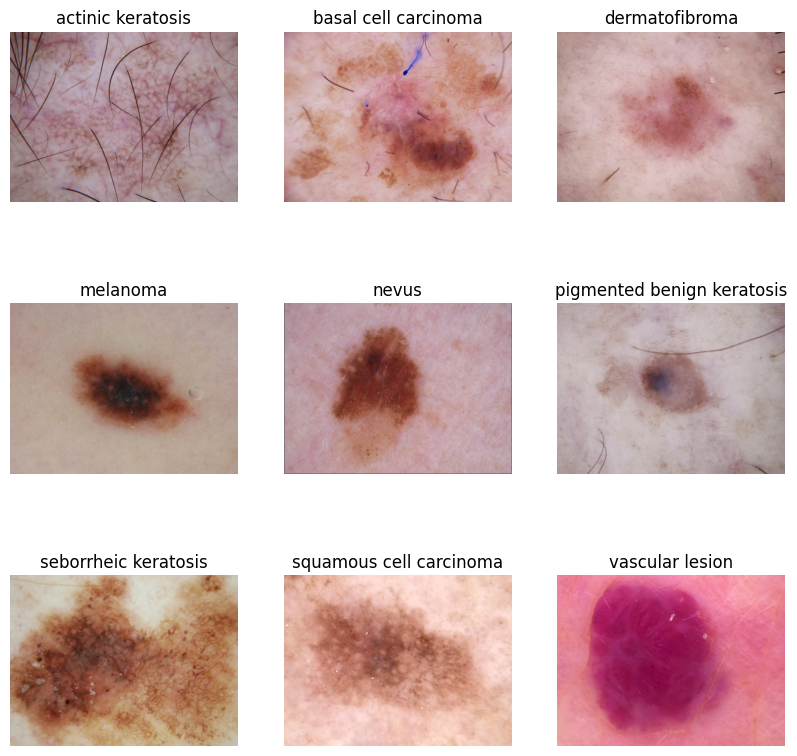

In [3]:
############## Listing all the classes of skin cancer and store them in a list ################ 
class_names = train_ds.class_names
print(class_names)


############## Visualisation ########################
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  image = plt.imread(
      str(list(data_path_train.glob(f'{class_names[i]}/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)
  plt.axis('off')

# STEP-4 Model Building & training

In [4]:
########################## Defining network architecture #####################
#Rescaling to normalize pixel values between (0,1). 
#The RGB channel values are in the [0, 255] range.
#Here, it is good to standardize values to be in the [0, 1]
model = Sequential()
model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model.add(Conv2D(32, kernel_size=(3, 3),padding = 'Same',activation= 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Conv2D(16, kernel_size=(7, 7),padding = 'Same',activation= 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(11,11),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(256, kernel_size=(3, 3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(9,activation='softmax'))

In [5]:
############################# Compile model ######################################
learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,verbose=1,factor=0.2, min_lr=1e-7)
opt=tf.keras.optimizers.Adam()
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [6]:
####################### Model Summary #######################################
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                   

In [8]:
########################### Training the model ####################################3
epochs = 20
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs,callbacks=[learn_control])

Epoch 1/20


56/56 [==============================] - 78s 1s/step - loss: 2.0706 - accuracy: 0.1920 - val_loss: 2.0920 - val_accuracy: 0.2058 - lr: 0.0010
Epoch 2/20
56/56 [==============================] - 54s 951ms/step - loss: 2.0411 - accuracy: 0.2026 - val_loss: 2.0429 - val_accuracy: 0.2058 - lr: 0.0010
Epoch 3/20
56/56 [==============================] - 57s 1s/step - loss: 2.0278 - accuracy: 0.1830 - val_loss: 2.0301 - val_accuracy: 0.2058 - lr: 0.0010
Epoch 4/20
56/56 [==============================] - 56s 980ms/step - loss: 2.0221 - accuracy: 0.1998 - val_loss: 2.0219 - val_accuracy: 0.2058 - lr: 0.0010
Epoch 5/20
56/56 [==============================] - 55s 914ms/step - loss: 2.0106 - accuracy: 0.2042 - val_loss: 1.9639 - val_accuracy: 0.2327 - lr: 0.0010
Epoch 6/20
56/56 [==============================] - 55s 967ms/step - loss: 1.9409 - accuracy: 0.2617 - val_loss: 1.8540 - val_accuracy: 0.3020 - lr: 0.0010
Epoch 7/20
56/56 [==============================] - 52s 920ms/step -

In [7]:
################### Visualizing training results ###########################
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: name 'history' is not defined

**Findings**

The Traing accuracy and validation accuracy are almost same, but very low which indicates that the model is underfitting.
Hence augmentaion required


# STEP-5 Data augmentation

In [8]:
############### Augumentation ##################
# augumentation strategy with flip,rotate,skew,shift, zoom, brightness, contrast, saturation, hue
data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
    layers.experimental.preprocessing.RandomContrast(0.1)
  ]
)

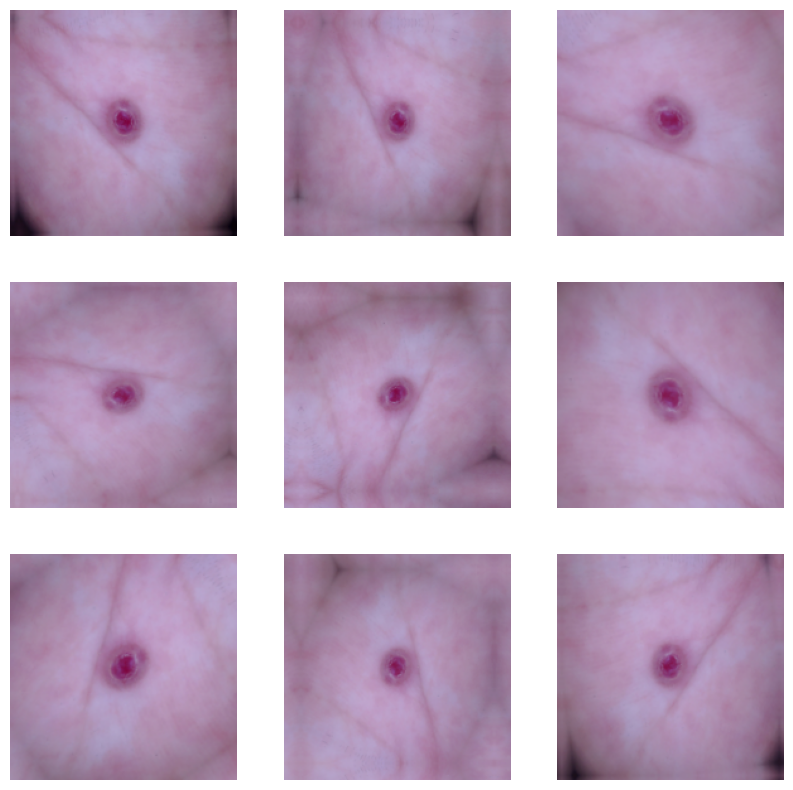

In [9]:
# visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

# STEP-6 Model Building & training on the augmented data training

In [10]:
########### Building ###############
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model.add(data_augmentation)
model.add(Conv2D(32, kernel_size=(3, 3),padding = 'Same',activation= 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Conv2D(16, kernel_size=(7, 7),padding = 'Same',activation= 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(11, 11),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(256, kernel_size=(3, 3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(9,activation='softmax'))

In [11]:
############################# Compile model ######################################
learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)
opt=tf.keras.optimizers.Adam()
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [12]:
###################### Model Summary ########################
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 90, 90, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 90, 90, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 90, 90, 64)        18496     
                                                      

In [21]:
############ Train the model ###############
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
              callbacks=[learn_control]
)

Epoch 1/20
56/56 [==============================] - 18s 274ms/step - loss: 2.0535 - accuracy: 0.1998 - val_loss: 2.0558 - val_accuracy: 0.1924 - lr: 0.0010
Epoch 2/20
56/56 [==============================] - 15s 270ms/step - loss: 2.0301 - accuracy: 0.2042 - val_loss: 2.0386 - val_accuracy: 0.2058 - lr: 0.0010
Epoch 3/20
56/56 [==============================] - 15s 276ms/step - loss: 2.0145 - accuracy: 0.2003 - val_loss: 2.0068 - val_accuracy: 0.2192 - lr: 0.0010
Epoch 4/20
56/56 [==============================] - 15s 272ms/step - loss: 1.9156 - accuracy: 0.2835 - val_loss: 1.8406 - val_accuracy: 0.2796 - lr: 0.0010
Epoch 5/20
56/56 [==============================] - 15s 268ms/step - loss: 1.8643 - accuracy: 0.2729 - val_loss: 1.7621 - val_accuracy: 0.3289 - lr: 0.0010
Epoch 6/20
56/56 [==============================] - 15s 268ms/step - loss: 1.7714 - accuracy: 0.3432 - val_loss: 1.6695 - val_accuracy: 0.3915 - lr: 0.0010
Epoch 7/20
56/56 [==============================] - 16s 284ms/st

In [13]:
############################# Visualising the results ######################################
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: name 'history' is not defined

**Findings**

1. The Training accuracy and validation accuracy are almost same. This is a sign of good fit but the accuracy is still very low. The model requires more epochs to train with class imbalance handled.


# STEP-7 Class distribution

In [25]:
# images in each classes
class_diff=[]
number=[]
for i in range(len(class_names)):
  class_diff.append(class_names[i])
  number.append(len(list(data_path_train.glob(f'{class_names[i]}/*.jpg'))))
    
df = pd.DataFrame(
    {'Class': class_diff,
     'Number': number,
    })

In [26]:
df

,Class,Number
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


<function matplotlib.pyplot.show(close=None, block=None)>

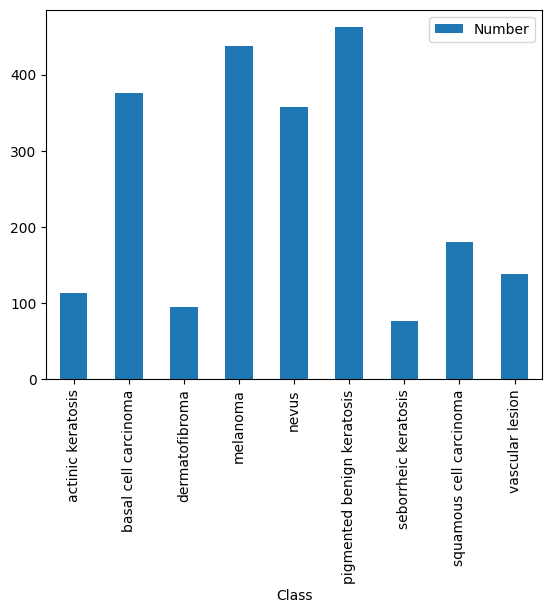

In [28]:
df.plot.bar(x='Class',y='Number',rot=90)
plt.show

**Findings**
#### - Which class has the least number of samples?
#### **Ans.** seborrheic keratosis (77)

#### - Which classes dominate the data in terms proportionate number of samples?
#### **Ans.** pigmented benign keratosis (462)


# STEP-8 Handling class imbalances

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [31]:
############### Rectify Class Imbalance ##################
class_names=['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
path_to_training_dataset="Data/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Data/Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2054467C210>: 100%|█| 500/500 [00:04<00:00, 122.90 Samples


Initialised with 376 image(s) found.
Output directory set to Data/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20544F01150>: 100%|█| 500/500 [00:03<00:00, 132.91 Samples


Initialised with 95 image(s) found.
Output directory set to Data/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20544914910>: 100%|█| 500/500 [00:04<00:00, 118.47 Samples


Initialised with 438 image(s) found.
Output directory set to Data/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=3872x2592 at 0x20543E37E50>: 100%|█| 500/500 [00:20<00:00, 24.21 Sample


Initialised with 357 image(s) found.
Output directory set to Data/Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=724x542 at 0x20544EF77D0>: 100%|█| 500/500 [00:18<00:00, 26.96 Samples/


Initialised with 462 image(s) found.
Output directory set to Data/Train/pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x205447959D0>: 100%|█| 500/500 [00:04<00:


Initialised with 77 image(s) found.
Output directory set to Data/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x20543ECF050>: 100%|█| 500/500 [00:10<00:00, 47.44 Samples


Initialised with 181 image(s) found.
Output directory set to Data/Train/squamous cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x205447D17D0>: 100%|█| 500/500 [00:04<00:


Initialised with 139 image(s) found.
Output directory set to Data/Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20544635450>: 100%|█| 500/500 [00:04<00:00, 107.83 Samples


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.


In [ ]:
# Image Count After Augmentor ####################
image_count_train = len(list(data_path_train.glob('*/output/*.jpg')))
print("New Image Count: ",image_count_train)


##################### Class Distribution after Augmentor ##############
path_list_new = list(glob(os.path.join(data_path_train, '*','output', '*.jpg')))
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_path_train, '*','output', '*.jpg'))]
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
for i in class_names:
    directory ='Data/Train'
    directory_out ='Data/Train'+'/'+i+'/output/'
    class_directory = pathlib.Path(directory)
    class_directory_out = pathlib.Path(directory_out)
    length=len(list(class_directory.glob(i+'/*.jpg')))
    length_out=len(list(class_directory_out.glob('*.jpg')))
    length_tot=length+length_out
    print(f'{i} has {length_tot} samples.')

So, now we have added 500 images to all the classes to maintain some class balance.

# STEP-9 Model Building & training on the rectified class imbalance data 

In [42]:
# Defining some parameters
batch_size = 32
img_height = 180
img_width = 180


################# Creating the new train Dataset ############
data_dir_train="Data/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)


################ Creating the new Validation Dataset ############
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.
Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [44]:
######### Model Building #############
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3))) 
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(256,kernel_size=(11,11),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(len(class_names),activation='softmax'))


################# Compiling Model ###################
learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)
opt=tf.keras.optimizers.Adam()
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


########## Model Summarry #####################
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 43, 43, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 41, 41, 128)      

In [39]:
############ Training ################
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
              callbacks=[learn_control]
)

Epoch 1/50
169/169 [==============================] - 13s 68ms/step - loss: 2.1472 - accuracy: 0.1712 - val_loss: 1.9704 - val_accuracy: 0.2843 - lr: 0.0010
Epoch 2/50
169/169 [==============================] - 10s 58ms/step - loss: 1.8328 - accuracy: 0.2867 - val_loss: 1.6131 - val_accuracy: 0.4009 - lr: 0.0010
Epoch 3/50
169/169 [==============================] - 10s 57ms/step - loss: 1.6417 - accuracy: 0.3711 - val_loss: 1.5030 - val_accuracy: 0.4068 - lr: 0.0010
Epoch 4/50
169/169 [==============================] - 10s 57ms/step - loss: 1.5627 - accuracy: 0.3908 - val_loss: 1.4178 - val_accuracy: 0.4529 - lr: 0.0010
Epoch 5/50
169/169 [==============================] - 10s 57ms/step - loss: 1.4866 - accuracy: 0.4275 - val_loss: 1.3411 - val_accuracy: 0.4581 - lr: 0.0010
Epoch 6/50
169/169 [==============================] - 10s 57ms/step - loss: 1.4262 - accuracy: 0.4407 - val_loss: 1.3098 - val_accuracy: 0.4826 - lr: 0.0010
Epoch 7/50
169/169 [==============================] - 10s 

### Visualize the model results


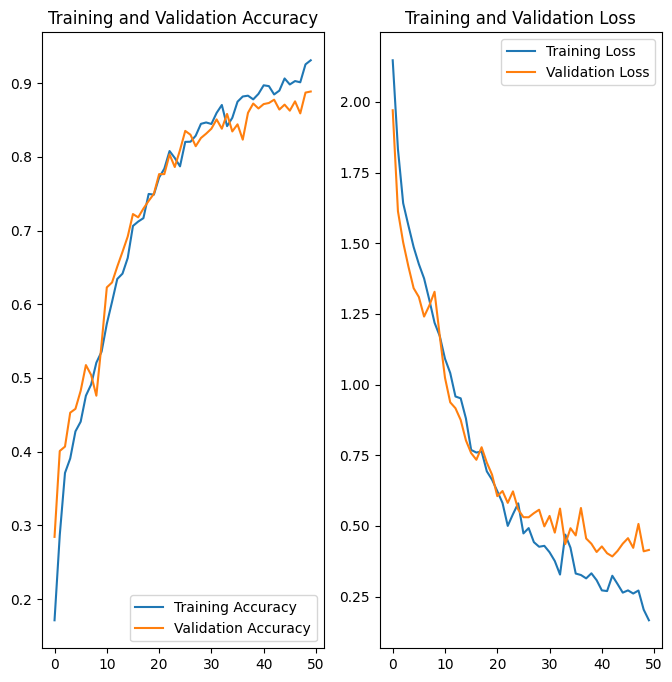

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Findings**
1. The training accuracy and validation accuracy are almost same. This is a sign of good fit.
2. The training loss and validation loss are almost same. This is a sign of good fit.
3. The Validation accuracy is 0.87 which is good. The model is able to classify the images with 87% accuracy.

### Test the model

1/1 [==============================] - 0s 197ms/step
Actual Class: basal cell carcinoma
Predictive Class: melanoma


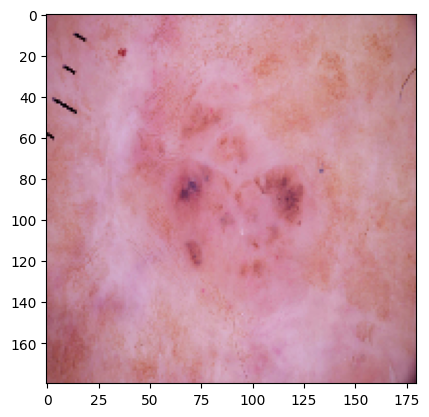

In [45]:
from glob import glob
from tensorflow.keras.preprocessing.image import load_img, img_to_array
Test_image_path = os.path.join(data_path_test, class_names[1], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print(f"Actual Class: {class_names[1]}" + '\n' + "Predictive Class: " + pred_class)